In [5]:
import pandas as pd
from sklearn import preprocessing


In [6]:
import pandas as pd

train_data = pd.read_csv('../CSV/RGB[Hist-16]_GLCM[S4-D5]_160_ROI_Training.csv')
train_data

,label,hist_r1,hist_r2,hist_r3,hist_r4,hist_r5,hist_r6,hist_r7,hist_r8,hist_r9,...,correlation 90,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135
0,1,1839.0,43628.0,232083.0,163830.0,71397.0,39873.0,33133.0,34117.0,27780.0,...,0.966713,0.961697,0.468558,0.463883,0.469122,0.464479,569.523418,613.842471,541.707489,622.899525
1,1,17801.0,304772.0,238549.0,56285.0,20537.0,10399.0,6478.0,4354.0,2835.0,...,0.980663,0.977039,0.500518,0.500514,0.506752,0.490928,355.902364,426.927445,383.138531,454.548177
2,1,111622.0,215029.0,188268.0,87102.0,42303.0,21318.0,12915.0,8100.0,4543.0,...,0.975275,0.974455,0.443371,0.434255,0.441013,0.440354,404.822637,502.147274,464.201503,479.004923
3,1,111523.0,215000.0,188451.0,87040.0,42328.0,21441.0,12762.0,8139.0,4488.0,...,0.978434,0.973220,0.441015,0.440202,0.443379,0.434027,464.197289,479.038716,404.887817,502.156757
4,1,123251.0,220725.0,188596.0,91094.0,45460.0,23023.0,13606.0,8489.0,4753.0,...,0.972421,0.968833,0.420966,0.413178,0.414207,0.412591,472.718456,543.876779,508.332982,573.521757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,5,764.0,24942.0,113540.0,177579.0,180307.0,126688.0,57002.0,15630.0,4230.0,...,0.965207,0.961757,0.399884,0.397110,0.399951,0.397181,558.858541,603.935808,543.087001,596.101268
796,5,3.0,706.0,12246.0,58610.0,127592.0,148479.0,159380.0,125552.0,56302.0,...,0.954070,0.950919,0.408091,0.404114,0.406544,0.403538,492.487835,544.806140,532.148277,567.891256
797,5,5322.0,130484.0,231110.0,164821.0,90675.0,58384.0,27076.0,7370.0,2877.0,...,0.970619,0.965250,0.415589,0.411794,0.418584,0.413724,583.603898,624.921499,530.138302,625.999836
798,5,3649.0,114261.0,213298.0,153203.0,83923.0,53023.0,24134.0,6030.0,2428.0,...,0.974423,0.971278,0.470517,0.463366,0.468463,0.464590,480.805072,558.316102,479.576938,538.119191


In [7]:
test_data = pd.read_csv('../CSV/RGB[Hist-16]_GLCM[S4-D5]_160_ROI_Testing.csv')
test_data

,label,hist_r1,hist_r2,hist_r3,hist_r4,hist_r5,hist_r6,hist_r7,hist_r8,hist_r9,...,correlation 90,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135
0,1,72572.0,222170.0,197390.0,96428.0,49773.0,33168.0,28945.0,24832.0,15625.0,...,0.973246,0.968114,0.404705,0.398687,0.409027,0.402626,523.784296,573.593563,470.953772,560.117784
1,1,3528.0,99351.0,211638.0,142762.0,89716.0,55049.0,28251.0,12091.0,5406.0,...,0.976804,0.972493,0.496974,0.485073,0.495824,0.491137,479.985611,567.413564,411.941828,488.154078
2,1,3543.0,99257.0,211631.0,142734.0,89819.0,55149.0,28121.0,12171.0,5345.0,...,0.972972,0.968029,0.495751,0.491261,0.497020,0.485344,411.921958,488.121100,479.965573,567.361611
3,1,67304.0,220363.0,194514.0,94204.0,49555.0,33124.0,28865.0,24318.0,14763.0,...,0.974429,0.970712,0.424787,0.413941,0.419258,0.416249,447.359626,525.207385,455.335745,520.562828
4,1,3576.0,99434.0,211369.0,142785.0,89855.0,55071.0,28180.0,12147.0,5387.0,...,0.976805,0.972493,0.496778,0.484945,0.495836,0.490881,479.974789,567.410942,411.928761,488.146907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,5,2734.0,30529.0,87505.0,129673.0,134095.0,117529.0,75371.0,30150.0,8668.0,...,0.965971,0.964295,0.469429,0.463879,0.468601,0.465607,575.646277,708.809138,591.317827,620.239874
156,5,4107.0,38067.0,100024.0,143988.0,145832.0,125712.0,82184.0,36312.0,11862.0,...,0.957084,0.953972,0.405491,0.401048,0.404461,0.400788,717.947295,794.794991,725.945332,777.637295
157,5,3680.0,32659.0,85523.0,121302.0,122108.0,104821.0,69198.0,31059.0,10616.0,...,0.958695,0.957108,0.494865,0.489900,0.492822,0.489874,642.404874,734.659806,724.680813,752.515619
158,5,3972.0,37869.0,100149.0,143996.0,145741.0,126244.0,82555.0,35809.0,11799.0,...,0.957104,0.954005,0.406410,0.401778,0.405417,0.402014,717.021086,794.334525,725.538217,777.021349


In [8]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
X_test = test_data.drop('label', axis=1)
y_true = test_data['label']

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 4, 2, 2, 2, 5, 2, 2, 2, 5, 5, 5, 4, 5, 5, 5,
       4, 4, 5, 5, 5, 5], dtype=int64)

In [12]:
X_test['label'] = y_pred
X_test

,hist_r1,hist_r2,hist_r3,hist_r4,hist_r5,hist_r6,hist_r7,hist_r8,hist_r9,hist_r10,...,correlation 135,homogeneity 0,homogeneity 45,homogeneity 90,homogeneity 135,contrast 0,contrast 45,contrast 90,contrast 135,label
0,72572.0,222170.0,197390.0,96428.0,49773.0,33168.0,28945.0,24832.0,15625.0,5499.0,...,0.968114,0.404705,0.398687,0.409027,0.402626,523.784296,573.593563,470.953772,560.117784,1
1,3528.0,99351.0,211638.0,142762.0,89716.0,55049.0,28251.0,12091.0,5406.0,2471.0,...,0.972493,0.496974,0.485073,0.495824,0.491137,479.985611,567.413564,411.941828,488.154078,1
2,3543.0,99257.0,211631.0,142734.0,89819.0,55149.0,28121.0,12171.0,5345.0,2505.0,...,0.968029,0.495751,0.491261,0.497020,0.485344,411.921958,488.121100,479.965573,567.361611,1
3,67304.0,220363.0,194514.0,94204.0,49555.0,33124.0,28865.0,24318.0,14763.0,5142.0,...,0.970712,0.424787,0.413941,0.419258,0.416249,447.359626,525.207385,455.335745,520.562828,1
4,3576.0,99434.0,211369.0,142785.0,89855.0,55071.0,28180.0,12147.0,5387.0,2473.0,...,0.972493,0.496778,0.484945,0.495836,0.490881,479.974789,567.410942,411.928761,488.146907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2734.0,30529.0,87505.0,129673.0,134095.0,117529.0,75371.0,30150.0,8668.0,2956.0,...,0.964295,0.469429,0.463879,0.468601,0.465607,575.646277,708.809138,591.317827,620.239874,4
156,4107.0,38067.0,100024.0,143988.0,145832.0,125712.0,82184.0,36312.0,11862.0,4189.0,...,0.953972,0.405491,0.401048,0.404461,0.400788,717.947295,794.794991,725.945332,777.637295,5
157,3680.0,32659.0,85523.0,121302.0,122108.0,104821.0,69198.0,31059.0,10616.0,3806.0,...,0.957108,0.494865,0.489900,0.492822,0.489874,642.404874,734.659806,724.680813,752.515619,5
158,3972.0,37869.0,100149.0,143996.0,145741.0,126244.0,82555.0,35809.0,11799.0,4148.0,...,0.954005,0.406410,0.401778,0.405417,0.402014,717.021086,794.334525,725.538217,777.021349,5


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        32
           2       0.80      1.00      0.89        32
           3       1.00      0.75      0.86        32
           4       0.89      1.00      0.94        32
           5       1.00      0.62      0.77        32

    accuracy                           0.88       160
   macro avg       0.90      0.88      0.87       160
weighted avg       0.90      0.88      0.87       160



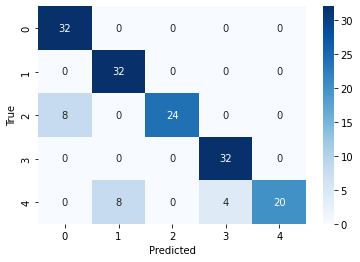

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [16]:
import joblib

# simpan model dalam file .pkl
# joblib.dump(model, '../Model/NB_RGB[Hist-16]_GLCM[S4-D5]_160_ROI_WithoutNormalize.pkl')